<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/Exercise-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, University of Bern, Sigve Haug

# Exercise 4

## 4.1 Blood Pressure Revised

Using the dataset with the blood pressure measurements, plot the mean blood pressure per age decade for both women and men. 


In [ ]:
url = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/bloodpressuredata.csv'

## 4.2 Run and Study this Code Example

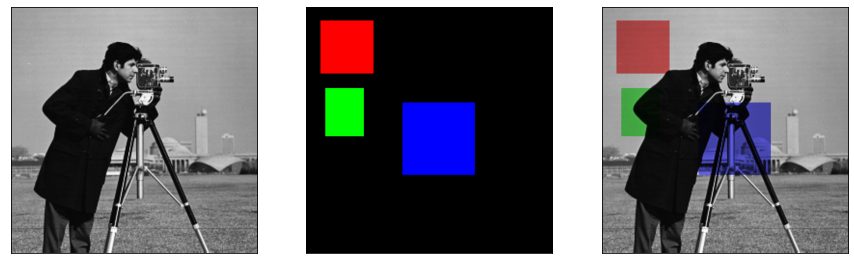

In [ ]:
from skimage import data, color, io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.6

img = img_as_float(data.camera())
rows, cols = img.shape

# Construct a colour image to superimpose
color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[200:350, 200:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []},figsize=(15,15))
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(color_mask)
ax2.imshow(img_masked)
plt.show( )